## Testing Independence
This notebook presents a kernel based test of independence. This test is different from a mutual information test. The mutual information test relies on the fact that the mutual information of two random variables is zero iff the random variables are independent. Such a test requires estimating the joint density of the random variables. The  kernel based test does not require computation of the joint density, and is based on estimating the so-called Hilbert-Schmidt norm. This test is discussed in 'Measuring Statistical Dependence with Hilbert-Schmidt Norms', by Gretton et al.

A little note : independence is different than correlation, unless the random variables are Gaussian. If a Gaussian assumption is valid, then an independence test can be realized by estimating the correlation of the random variables, which is much easier...

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In order to experiment with the independence test, I will produce two random variables, that are uniformly distributed on the unit ball of the $\ell_p$ norm, for different values of $p$. Note that for $p = \infty$, the random variables are independent, whereas for $p < \infty$, they are not -- I think it's fair to say that independence decreases with $p$ (perhaps this can be quantized using mutual information). In any case, my goal is to show that the test statistic also shows a monotonic trend with respect to $p$. 

Below is the function that computes the test statistic. Given infinitely many samples of $X_1$, $X_2$, this test statistic is zero if and only if $X_i$'s are independent.

In [2]:
def HSIC(X,sig):
    # we're testing if the two columns of X are independent or not
    m = X.shape[0] # number of observations
    #Construct the H, K and L matrices
    H = np.eye(m) - 1/m
    gauss = lambda x, sig : np.exp(-(x**2) /sig**2 )
    X1 = X[:,0]
    X1.shape = (m,1)
    X2 = X[:,1]
    X2.shape = (m,1)

    K = gauss( X1 - X1.T, sig )
    L = gauss( X2 - X2.T, sig )
    return np.sum( np.dot(H.T,K) * np.dot(L,H) ) / ( (m-1)**2 )

Below, I produce $K$ samples for each $p$ value, and compute the statistic for testing independence. This is repeated $T$ times. Thus, for each $p$ value, we have $T$ independent realizations of the test statistic. Below, I show the data for a trial for each $p$ value once. Notice how the data distribution converges from a square whose edges are not aligned with the axes (dependent) to a square whose edges are aligned with the axes (independent).

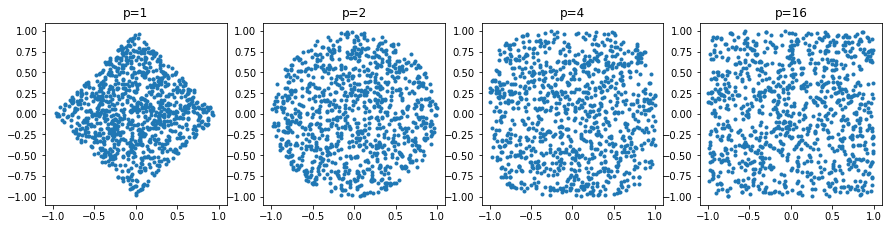

In [3]:
T = 100 # number of trials for each p value
plist = [1,2,4,16]
Hlist = np.empty((T,len(plist)))
sig = 0.5 # the std of the gaussian function used in the kernel
Kmax = 2250 # number of samples to generate the dependent distributions -- some of these will be discarded
K = 1000 # this is the actual number of samples used ...
plt.figure(figsize = (15,60))
for idx, p in enumerate(plist):
    for t in range(T):
        Z = np.random.uniform(-1,1,(Kmax,2))
        M = np.sum(np.abs(Z)**p,axis = 1)
        ind = (M < 1)
        X = Z[(M < 1),:]
        X = X[:K,:] # make sure the number of samples is the same for each p value
        Hlist[t,idx] = HSIC(X,sig)
        if t == 0:
            plt.subplot(1,4,(idx+1))
            plt.axis('image')
            plt.xlim(-1.1,1.1)
            plt.ylim(-1.1,1.1)
            plt.plot(X[:,0],X[:,1],'.')
            plt.title('p=%d'%p)
            
            

After I obtain the collection of the test statistics, below I plot the histogram of the test statistic for each $p$ value. Notice that on average, the test statistic decreases with $p$.

Logarithm of the mean of test statistic for each value of p:
(p = 1) :  -5.094
(p = 2) :  -5.946
(p = 4) :  -7.073
(p = 16) :  -7.938


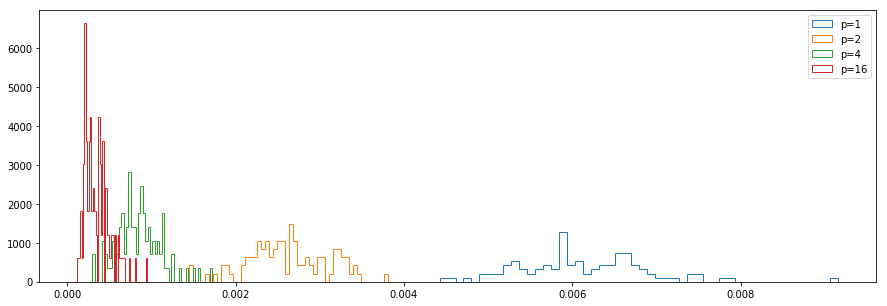

In [4]:
histbin = 50
plt.figure(figsize=(15,5))
for t in range(len(plist)):
    plt.hist(Hlist[:,t], bins = histbin, density = True, histtype = 'step',label='p=%d'%plist[t])
plt.legend()
mp = np.mean( Hlist,axis=0)
print('Logarithm of the mean of test statistic for each value of p:')
for p, sts in zip(plist, mp):
    print('(p = %d) :  %.3f'%(p,np.log(sts)))

#### Ilker Bayram, ibayram@ieee.org